#TASK 1

Training a model for NLP (LinearSVC)

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Allocating the data training
train_df = pd.read_csv("/content/drive/MyDrive/TweetsData.csv")
train_df

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
...,...,...,...,...,...
785809,1050705141207367680,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,:)
785810,1050706655049109504,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,Positivo,:)
785811,1050705846907392005,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,:)
785812,1050705490232127489,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,:)


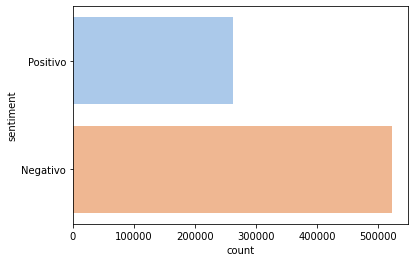

In [ ]:
#Showing the data of target class
sns.countplot(y="sentiment", data=train_df, palette="pastel")

Setting the pipe line, LabelEnconder and training the model (LinearSVC)

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(train_df['sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df['tweet_text'], Y, test_size=0.2, random_state=5)

In [ ]:
pipeline = Pipeline([
                     ('vectorizer', TfidfVectorizer()),
                     ('clf', LinearSVC())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

Accuracy Score and information about the success of algorithm

In [ ]:
pred = pipeline.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8081545910933234

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86    104294
           1       0.74      0.67      0.70     52869

    accuracy                           0.81    157163
   macro avg       0.79      0.77      0.78    157163
weighted avg       0.80      0.81      0.81    157163



In [ ]:
le.classes_

array(['Negativo', 'Positivo'], dtype=object)

# TASK 2
  WebScraping from twitter

In [ ]:
!pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Importing the twint library, it's a great scraper for data on twitter

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

In [ ]:
#Search setup and tweet limit
searched = input()
limitOfTweets = input()

flow podcast
1000


In [ ]:
#Configuration of query
query = twint.Config()
query.Search = searched
query.Store_csv = True
query.Limit = limitOfTweets
query.Output = "output.csv"
#Run the search
twint.run.Search(query)

In [ ]:
#Allocating the result of query in a variable
tweets = pd.read_csv('output.csv')
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445198897698250753,1445198897698250753,2021-10-05 01:27:22 UTC,2021-10-05,01:27:22,0,2298688885,recatadaedolar,Lorena,NaN,É vou ter que ouvir o Freixo no Flow e aturar ...,pt,[],[],[],0,0,0,[],[],https://twitter.com/recatadaedolar/status/1445...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1445197320153403394,1445197320153403394,2021-10-05 01:21:06 UTC,2021-10-05,01:21:06,0,1327661569111678977,xandao_imorais,opoprioxande,NaN,Freixo falando no podcast flow que fez mais pr...,pt,"[{'screen_name': 'spinellirio', 'name': 'mauri...",[],[],1,0,2,[],[],https://twitter.com/xandao_Imorais/status/1445...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1445195469983035395,1445195469983035395,2021-10-05 01:13:45 UTC,2021-10-05,01:13:45,0,336035358,danielsetragni,Daniel Setragni,NaN,MARCELO FREIXO - Flow Podcast #476 https://t....,pt,"[{'screen_name': 'youtube', 'name': 'youtube',...",['https://youtu.be/EhaSRmwRl7Y'],[],0,0,0,[],[],https://twitter.com/danielsetragni/status/1445...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1445193630927527943,1445193630927527943,2021-10-05 01:06:26 UTC,2021-10-05,01:06:26,0,43091746,alexnazare,Alex Nazaré🕊🆘,NaN,Vem da o papo MARCELO FREIXO - Flow Podcast #4...,pt,"[{'screen_name': 'facebookwatch', 'name': 'fac...",['https://fb.watch/8rnoICG4E2/'],[],0,0,0,[],[],https://twitter.com/AlexNazare/status/14451936...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1445192876569288704,1445192876569288704,2021-10-05 01:03:26 UTC,2021-10-05,01:03:26,0,1083150303124434945,freixodebochado,Freixo Debochado 4️⃣0️⃣ 🏳️‍🌈 #FreixoGovernador,NaN,Acompanhe o Flow Podcast de Hoje com @MarceloF...,pt,"[{'screen_name': 'marcelofreixo', 'name': 'mar...",[],[],6,6,62,['freixonoflow'],[],https://twitter.com/FreixoDebochado/status/144...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1443064274868375557,1443060214824153091,2021-09-29 04:05:08 UTC,2021-09-29,04:05:08,0,2172224763,thiagoadrn,Thiago Adriano,NaN,"@peterjordan100 Na minha opinião, o melhor Pod...",pt,[],[],[],0,0,3,[],[],https://twitter.com/thiagoadrn/status/14430642...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'peterjordan100', 'name': 'Pe...",NaN,NaN,NaN,NaN
1111,1443056964565667845,1443027994944098309,2021-09-29 03:36:05 UTC,2021-09-29,03:36:05,0,1277894577576427520,icaro_barreto21,Ícaroᶠᶠᶜ🇭🇺,NaN,@podpahpodcast NUNCA SERÃO FLOW PODCAST,pt,[],[],[],0,0,0,[],[],https://twitter.com/Icaro_Barreto21/status/144...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'podpahpodcast', 'name': 'Pod...",NaN,NaN,NaN,NaN
1112,1443050123647492097,1443050123647492097,2021-09-29 03:08:54 UTC,2021-09-29,03:08:54,0,778389387109433345,danteragan,Dante La Esperantisto 🇧🇷,NaN,Flow é tipo a Jovem Pan dos podcasts,pt,[],[],[],0,0,5,[],[],https://twitter.com/DanteRagan/status/14430501...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1113,1443047950893129729,1443047950893129729,2021-09-29 03:00:16 UTC,2021-09-29,03:00:16,0,14847136,zastrich,Zastrich,NaN,Conversa com Bial vai mostrar a febre dos podc...,pt,"[{'screen_name': 'flowpdc', 'name': 'flow podc...",[],[],0,0,0,"['conversacombial', 'flowpodcast']",[],https://twitter.com/zastrich/status/1443047950...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#Counting the negative and positive items
countNegative = 0
countPositive = 0

for i, row in tweets.iterrows():
  text = row['tweet']
  prediction = pipeline.predict([text])
  if prediction == 0:
    countNegative =  countNegative + 1
  else:
    countPositive = countPositive + 1
print(countNegative, "negative tweets and", countPositive, "positive tweets.")

231 negative tweets and 884 positive tweets.


# TASK 3

Building a wordcloud

In [ ]:
!pip install wordcloud

Importing the wordcloud library and matplot

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Selecting the content of tweets
wordcloud_data = tweets['tweet']

In [ ]:
#Separating items of the list
wordcloud_data = " ".join(s for s in tweets['tweet'])

In [ ]:
wordcloud_data

Generating a wordcloud with data scrapped from twitter

In [ ]:
#Selecting stopwords
stopwords = set(STOPWORDS)
stopwords.update([searched, "https", "da", "meu", "em", "os", "ao", "mas", "pra", "no", "foi", "para", "se"])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(wordcloud_data)

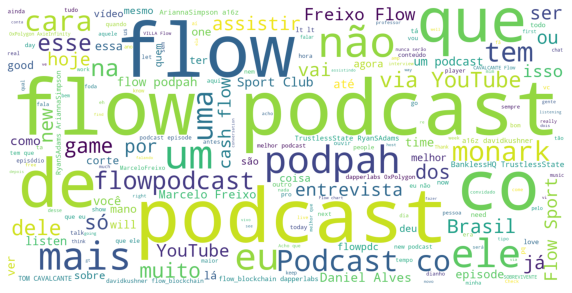

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")